# Exploratory Data Analysis

In [ ]:
import os
import json
import random
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load the Dataset

In [2]:
file_path = '/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json'

with open(file_path, 'r') as f:
    first_line = f.readline()

keys = json.loads(first_line).keys()

print("Keys in the dataset:")
for key in keys:
    print(f"- {key}")

Keys in the dataset:
- id
- submitter
- authors
- title
- comments
- journal-ref
- doi
- report-no
- categories
- license
- abstract
- versions
- update_date
- authors_parsed


#### The dataset contains the following keys:
 
 - `id`: Unique identifier for each paper.
 - `submitter`: Name of the person who submitted the paper.
 - `authors`: List of authors for the paper.
 - `title`: Title of the paper.
 - `comments`: Additional comments related to the paper.
 - `journal-ref`: Journal reference where the paper was published.
 - `doi`: Digital object identifier.
 - `report-no`: Report number.
 - `categories`: Categories under which the paper is classified.
 - `license`: Licensing information for the paper.
 - `abstract`: Abstract of the paper.
 - `versions`: Different versions of the paper.
 - `update_date`: Date of last update.
 - `authors_parsed`: Parsed authors' details.

## Extract Relevant Data
We now load the dataset into a more manageable format by filtering the papers published after 2019. We focus on the id, authors, title, categories, year, and abstract fields for our analysis.

In [ ]:
THRESHOLD_YEAR = 2019 

dataframe = {
    'id': [],
    'authors': [],
    'title': [],
    'categories': [],
    'year': [],
    'abstract': []
}

def load_data():
    with open(file_path) as f:
        for line in f:
            yield line

data = load_data()
for i, paper in enumerate(data):
    paper = json.loads(paper)
    try:
        date = int(paper['update_date'].split('-')[0])
        if date > THRESHOLD_YEAR:
            dataframe['id'].append(paper['id'])
            dataframe['authors'].append(paper['authors'])
            dataframe['title'].append(paper['title'])
            dataframe['categories'].append(paper['categories'])
            dataframe['year'].append(date)
            dataframe['abstract'].append(paper['abstract'])
    except: pass

In [4]:
df = pd.DataFrame(dataframe)
df.head()

id                                            authors  \
0  0704.0033  Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...   
1  0704.0038                Maxim A. Yurkin, Alfons G. Hoekstra   
2  0704.0275                   George M. Bergman (U.C.Berkeley)   
3  0704.0348                                       G. Stasinska   
4  0704.0479                                          T.Geisser   

                                               title  \
0  Convergence of the discrete dipole approximati...   
1  The discrete dipole approximation: an overview...   
2                     Mapping radii of metric spaces   
3                   What can emission lines tell us?   
4               The affine part of the Picard scheme   

                                                 doi  \
0    10.1364/JOSAA.23.002578 10.1364/JOSAA.32.002407   
1  10.1016/j.jqsrt.2007.01.034 10.1016/j.jqsrt.20...   
2                           10.2140/pjm.2008.236.223   
3                       10.1017/CBO9780511552038.003   
4                                               None   

                       categories  year  \
0  physics.optics physics.comp-ph  2022   
1  physics.optics physics.comp-ph  2022   
2                         math.MG  2021   
3                        astro-ph  2023   
4                 math.AG math.KT  2021   

                                            abstract  
0    We performed a rigorous theoretical converge...  
1    We present a review of the discrete dipole a...  
2    It is known that every closed curve of lengt...  
3    1 Generalities\n  2 Empirical diagnostics ba...  
4    We describe the maximal torus and maximal un...

In [5]:
df.to_csv('arxiv_reduced.csv', index=False)

In [6]:
del dataframe

## Exploratory Data Analysis

### Dataset Structure

In [7]:
df.shape

(1097828, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097828 entries, 0 to 1097827
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   id          1097828 non-null  object
 1   authors     1097828 non-null  object
 2   title       1097828 non-null  object
 3   doi         363009 non-null   object
 4   categories  1097828 non-null  object
 5   year        1097828 non-null  int64 
 6   abstract    1097828 non-null  object
dtypes: int64(1), object(6)
memory usage: 58.6+ MB


In [9]:
any(df.isna().sum())

True

### Year Distribution

<Axes: xlabel='year'>

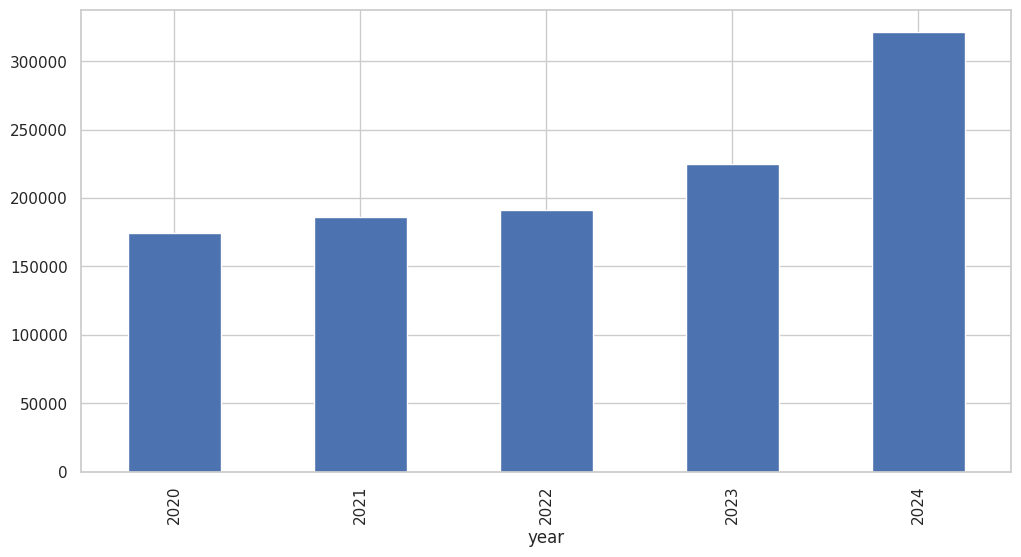

In [10]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))

### Abstract Length

In [11]:
df['abstract_length'] = df['abstract'].str.len()
df.head()

id                                            authors  \
0  0704.0033  Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...   
1  0704.0038                Maxim A. Yurkin, Alfons G. Hoekstra   
2  0704.0275                   George M. Bergman (U.C.Berkeley)   
3  0704.0348                                       G. Stasinska   
4  0704.0479                                          T.Geisser   

                                               title  \
0  Convergence of the discrete dipole approximati...   
1  The discrete dipole approximation: an overview...   
2                     Mapping radii of metric spaces   
3                   What can emission lines tell us?   
4               The affine part of the Picard scheme   

                                                 doi  \
0    10.1364/JOSAA.23.002578 10.1364/JOSAA.32.002407   
1  10.1016/j.jqsrt.2007.01.034 10.1016/j.jqsrt.20...   
2                           10.2140/pjm.2008.236.223   
3                       10.1017/CBO9780511552038.003   
4                                               None   

                       categories  year  \
0  physics.optics physics.comp-ph  2022   
1  physics.optics physics.comp-ph  2022   
2                         math.MG  2021   
3                        astro-ph  2023   
4                 math.AG math.KT  2021   

                                            abstract  abstract_length  
0    We performed a rigorous theoretical converge...              832  
1    We present a review of the discrete dipole a...              617  
2    It is known that every closed curve of lengt...              737  
3    1 Generalities\n  2 Empirical diagnostics ba...              181  
4    We describe the maximal torus and maximal un...              126

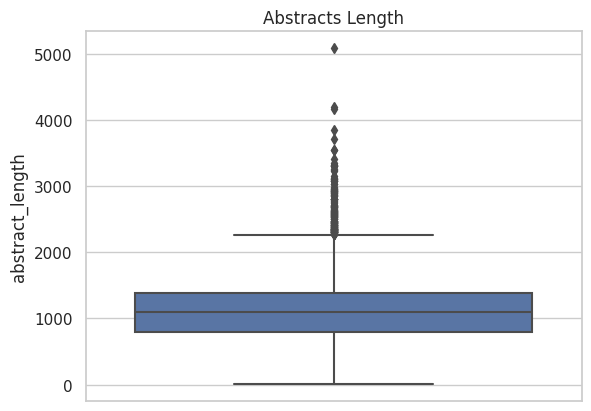

In [12]:
sns.boxplot(data=df, y='abstract_length')
plt.title("Abstracts Length")
plt.show()

### Word Count

In [13]:
def word_count(x):
    return len(x.split())

df['word_count'] = df['abstract'].apply(word_count)
df.head()

id                                            authors  \
0  0704.0033  Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...   
1  0704.0038                Maxim A. Yurkin, Alfons G. Hoekstra   
2  0704.0275                   George M. Bergman (U.C.Berkeley)   
3  0704.0348                                       G. Stasinska   
4  0704.0479                                          T.Geisser   

                                               title  \
0  Convergence of the discrete dipole approximati...   
1  The discrete dipole approximation: an overview...   
2                     Mapping radii of metric spaces   
3                   What can emission lines tell us?   
4               The affine part of the Picard scheme   

                                                 doi  \
0    10.1364/JOSAA.23.002578 10.1364/JOSAA.32.002407   
1  10.1016/j.jqsrt.2007.01.034 10.1016/j.jqsrt.20...   
2                           10.2140/pjm.2008.236.223   
3                       10.1017/CBO9780511552038.003   
4                                               None   

                       categories  year  \
0  physics.optics physics.comp-ph  2022   
1  physics.optics physics.comp-ph  2022   
2                         math.MG  2021   
3                        astro-ph  2023   
4                 math.AG math.KT  2021   

                                            abstract  abstract_length  \
0    We performed a rigorous theoretical converge...              832   
1    We present a review of the discrete dipole a...              617   
2    It is known that every closed curve of lengt...              737   
3    1 Generalities\n  2 Empirical diagnostics ba...              181   
4    We describe the maximal torus and maximal un...              126   

   word_count  
0         133  
1          96  
2         138  
3          27  
4          21

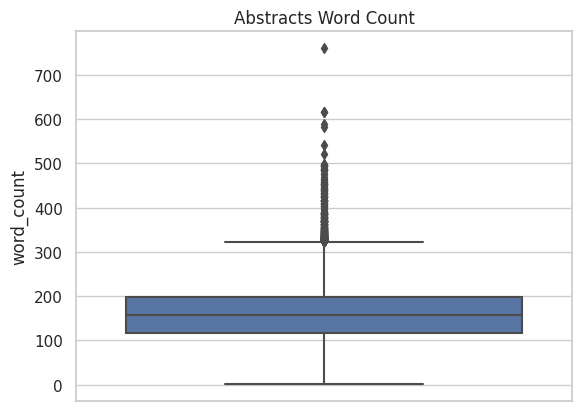

In [14]:
sns.boxplot(data=df, y='word_count')
plt.title("Abstracts Word Count")
plt.show()

In [15]:
df['word_count'].describe().round(2)

count    1097828.00
mean         158.22
std           59.44
min            1.00
25%          116.00
50%          157.00
75%          199.00
max          760.00
Name: word_count, dtype: float64

### Longest Abstracts

In [16]:
longest_abstracts = df.sort_values(by='abstract_length', ascending=False).head(10)
longest_abstracts

id                                            authors  \
66878    1908.01511  G. Berthet, L. Lavoine, M. Parit, A. Brolis, A...   
235228   2010.03822  Julien Fatome (LICB), Bertrand Kibler, Fran\c{...   
1040472  2410.07195  Mojtaba Houballah, Jean-Yves Courtonne, Henri ...   
989741   2407.16278  Erwann Landais (AUCTUS), Nasser Rezzoug (RoBio...   
1069794  2411.12291  Abolfazl Mohammadi Gorjaei, Mohammad Ali Nazar...   
615661   2211.01679  Carlos Rojas Castillo (Vrije Universiteit Brus...   
1047499  2410.14222                             Marie Puren (LRE, CJM)   
1071134  2411.13631                                 Nagabhushan Somraj   
118681   2002.06182  Steven Costiou (INRIA, France), Vincent Araneg...   
636721   2212.05468  Maxwell Pirtle (Northeastern University, USA),...   

                                                     title  \
66878    Observation of the algebraic localization-delo...   
235228   Polarization modulation instability in a nonli...   
1040472  The aftermath of the Covid pandemic in the for...   
989741   Re-expression of manual expertise through semi...   
1069794  Investigation of Vibrational Frequency of Cani...   
615661   Out-of-Things Debugging: A Live Debugging Appr...   
1047499  Digital Humanities in the TIME-US Project: Ric...   
1071134  Sparse Input View Synthesis: 3D Representation...   
118681   Sub-method, partial behavioral reflection with...   
636721   McMini: A Programmable DPOR-Based Model Checke...   

                                               doi  \
66878             10.1103/PhysRevResearch.2.013386   
235228                           10.1364/OL.400474   
1040472                                       None   
989741                        10.54941/ahfe1005012   
1069794                                       None   
615661   10.22152/programming-journal.org/2023/7/5   
1047499                                       None   
1071134                                       None   
118681   10.22152/programming-journal.org/2020/4/5   
636721   10.22152/programming-journal.org/2024/8/1   

                              categories  year  \
66878    physics.atom-ph cond-mat.dis-nn  2020   
235228                    physics.optics  2020   
1040472                         q-fin.GN  2024   
989741                             cs.RO  2024   
1069794                   physics.med-ph  2024   
615661                             cs.PL  2022   
1047499                            cs.CY  2024   
1071134                            cs.CV  2024   
118681                             cs.PL  2020   
636721                       cs.LO cs.PL  2023   

                                                  abstract  abstract_length  \
66878      In a one-dimensional (1D) disordered potenti...             5089   
235228     We report on the experimental and numerical ...             4199   
1040472    Context: Over the last decade, the forestry ...             4168   
989741     While the search for new solvents in the che...             3857   
1069794    Introduction Speech is an integral component...             3711   
615661     Context: Internet of Things (IoT) has become...             3546   
1047499    In 2015, the Annales journal, traditionally ...             3545   
1071134    Novel view synthesis refers to the problem o...             3406   
118681     Context. Refining or altering existing behav...             3350   
636721     Context: Model checking has become a key too...             3325   

         word_count  
66878           760  
235228          617  
1040472         615  
989741          588  
1069794         582  
615661          496  
1047499         521  
1071134         541  
118681          494  
636721          475

### Categories

In [17]:
categories_list = df['categories'].str.split(' ', expand=True).stack()
category_counts = categories_list.value_counts()
category_counts.head(10)

cs.LG                161401
cs.CV                111055
cs.AI                 91061
quant-ph              62804
cs.CL                 59734
hep-th                42017
hep-ph                41605
stat.ML               40091
cond-mat.mtrl-sci     37704
gr-qc                 35079
Name: count, dtype: int64

### Abstracts

In [21]:
df['abstract'].describe(include='all')

count                                               1097828
unique                                              1097628
top         The one-dimensional harmonic oscillator in a...
freq                                                      3
Name: abstract, dtype: object

In [22]:
df.drop_duplicates(['abstract',], inplace=True)
df['abstract'].describe(include='all')

count                                               1097628
unique                                              1097628
top         We performed a rigorous theoretical converge...
freq                                                      1
Name: abstract, dtype: object

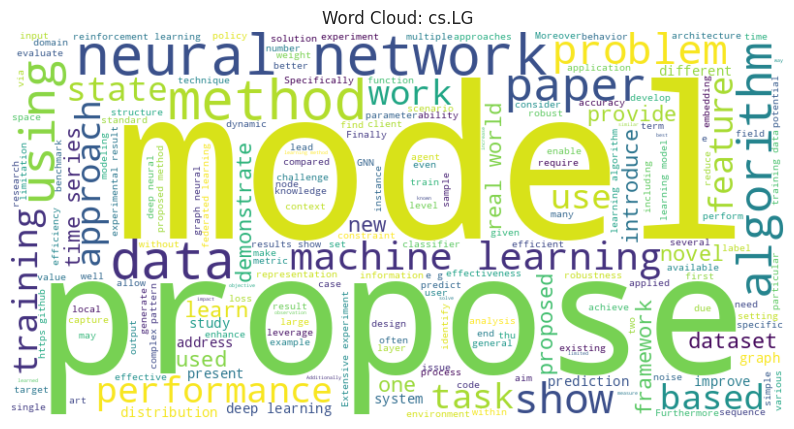

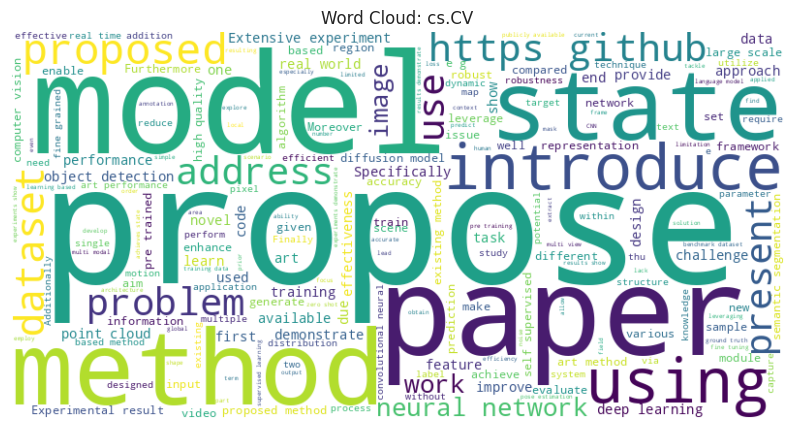

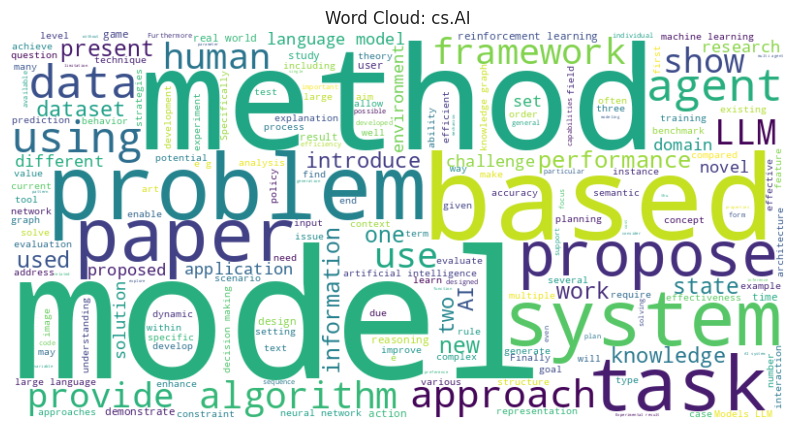

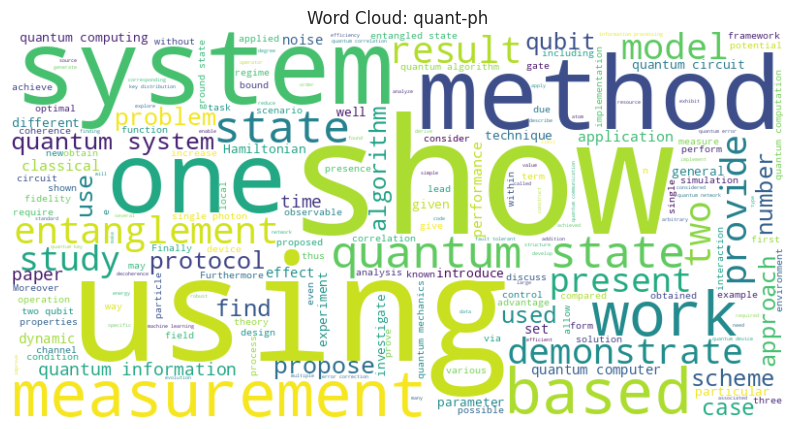

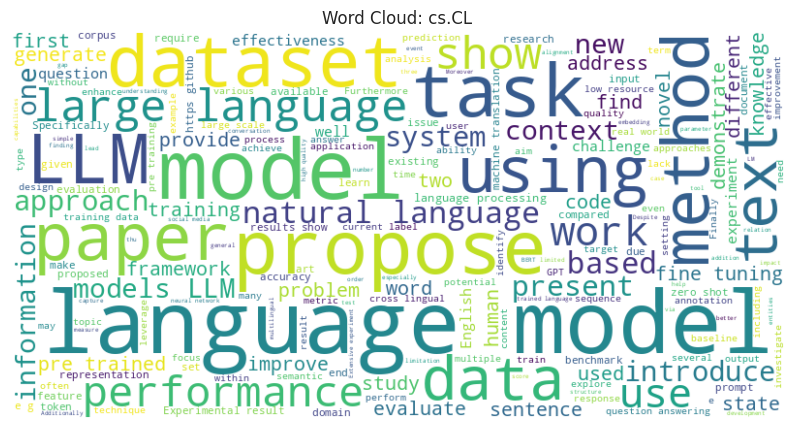

In [18]:
from wordcloud import WordCloud

top_categories = category_counts.head(5).index
top_category_df = df[df['categories'].isin(top_categories)]

for i, category in enumerate(top_categories):
    category_papers = top_category_df[top_category_df['categories'].str.contains(category)]
    text = ' '.join(category_papers['abstract'])
    
    plt.figure(figsize=(10, 8))
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud: {category}')
    plt.axis('off')
    
    plt.show()

# Preprocessing

In [19]:
df.head()

id                                            authors  \
0  0704.0033  Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...   
1  0704.0038                Maxim A. Yurkin, Alfons G. Hoekstra   
2  0704.0275                   George M. Bergman (U.C.Berkeley)   
3  0704.0348                                       G. Stasinska   
4  0704.0479                                          T.Geisser   

                                               title  \
0  Convergence of the discrete dipole approximati...   
1  The discrete dipole approximation: an overview...   
2                     Mapping radii of metric spaces   
3                   What can emission lines tell us?   
4               The affine part of the Picard scheme   

                                                 doi  \
0    10.1364/JOSAA.23.002578 10.1364/JOSAA.32.002407   
1  10.1016/j.jqsrt.2007.01.034 10.1016/j.jqsrt.20...   
2                           10.2140/pjm.2008.236.223   
3                       10.1017/CBO9780511552038.003   
4                                               None   

                       categories  year  \
0  physics.optics physics.comp-ph  2022   
1  physics.optics physics.comp-ph  2022   
2                         math.MG  2021   
3                        astro-ph  2023   
4                 math.AG math.KT  2021   

                                            abstract  abstract_length  \
0    We performed a rigorous theoretical converge...              832   
1    We present a review of the discrete dipole a...              617   
2    It is known that every closed curve of lengt...              737   
3    1 Generalities\n  2 Empirical diagnostics ba...              181   
4    We describe the maximal torus and maximal un...              126   

   word_count  
0         133  
1          96  
2         138  
3          27  
4          21

In [20]:
df.shape

(1097828, 9)

In [37]:
df_sample = df.sample(10000, random_state=42)

## Text Preprocessing

- **Text Normalization**: Lowercasing, removing punctuation, etc.
- **Removing Stopwords**: Use a stopword list to remove common, less meaningful words like "the," "is," "and."
- **Lemmatization**: Reducing words to their root form.

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

In [27]:
parser = en_core_sci_lg.load()

def spacy_tokenizer(sentence):
    ''' Function to preprocess text of scientific papers 
        (e.g Removing Stopword and puntuations)'''
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ] # transform to lowercase and then split the scentence
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ] #remove stopsword an punctuation
    mytokens = " ".join([i for i in mytokens]) 
    return mytokens

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [29]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['should',
 'every',
 'under',
 '‘ve',
 'hereafter',
 'almost',
 'make',
 'whenever',
 'which',
 'below']

In [39]:
tqdm.pandas()
df_sample['abstract_processed'] = df_sample['abstract'].progress_apply(spacy_tokenizer)
df_sample['abstract'].iloc[0], df_sample['abstract_processed'].iloc[0]

100%|██████████| 10000/10000 [06:51<00:00, 24.33it/s]


("  In this paper, an artificial noise-aided strategy is presented for\nlocation-privacy preservation. A novel framework for the reduction of\nlocation-privacy leakage is introduced, where structured artificial noise is\ndesigned to degrade the structure of the illegitimate devices' channel, without\nthe aid of channel state information at the transmitter. Then, based on the\nlocation-privacy enhancement framework, a transmit beamformer is proposed to\nefficiently inject the structured artificial noise. Furthermore, the securely\nshared information is characterized to enable the legitimate devices to\nlocalize accurately. Numerical results show a 9dB degradation of illegitimate\ndevices' localization accuracy is achieved, and validate the efficacy of\nstructured artificial noise versus unstructured Gaussian noise.\n",
 'paper artificial noise-aided strategy present location-privacy preservation novel framework reduction location-privacy leakage introduce structured artificial noise des

## TF-IDF Vectorzation

TF-IDF combines two metrics:

1. **Term Frequency (TF)**: Measures how often a term appears in a document.

$$TF(t,d) = \frac{\mathrm{Number\ of\ times\ term}\ 𝑡\ \mathrm{appears\ in\ document}\ d}{\mathrm{Total\ number\ of\ terms\ in\ document}\ 𝑑}$$

2. **Inverse Document Frequency (IDF)**: Measures how unique or important a term is across all documents in the corpus. Terms appearing in many documents get a lower score.

$$IDF(t,D) = \log \left(\frac{\mathrm{Total\ number\ of\ documents}\ D}{\mathrm{Number\ of\ documents containing term}\ t} + 1 \right)$$

TF-IDF: Combines the two metrics to weigh terms based on their frequency in a document and rarity across the corpus.

$$TFIDF(t, d, D) = TF(t,d) \times IDF(t, D)$$

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(text, features):    
    vectorizer = TfidfVectorizer(max_features=features)
    X = vectorizer.fit_transform(text)
    return X

In [88]:
abstracts = df_sample['abstract_processed'].values

X = vectorize(abstracts, 2 ** 12)
X.shape

(10000, 4096)

## Dimensionality Reduction

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42) # 95% of the variance
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(10000, 2799)

# Clutering

In [61]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn import metrics

## KMeans Clustering

A partition-based clustering algorithm that divides data into \( k \) clusters by minimizing the sum of squared distances between data points and their assigned cluster centroids.

**Calculation**:
  - Initialize $k$ cluster centroids.
  - Assign each data point to the nearest centroid based on Euclidean distance.
  - Update centroids by calculating the mean of points in each cluster.
  - Repeat until centroids stabilize or a maximum number of iterations is reached.

**Formula**: 
$$\min \sum_{i=1}^k \sum_{x \in C_i} \|x - \mu_i\|^2$$

where $C_i$ is the $i$-th cluster, $\mu_i$ is the centroid of $C_i$, and $\|\cdot\|$ represents Euclidean distance.

### Optimal K Value

In [45]:
random_seed = 42
cluster_errors = []

for i in range(1, 50):
    n_clusters = i
    pipe_pca_kmean = Pipeline([(
        "cluster", 
        KMeans(n_clusters=n_clusters, random_state=random_seed, n_init=1)
    )])

    pipe_pca_kmean.fit(X_reduced)
    pipe_pca_kmean.predict(X_reduced)
    cluster_errors.append(pipe_pca_kmean.named_steps["cluster"].inertia_)

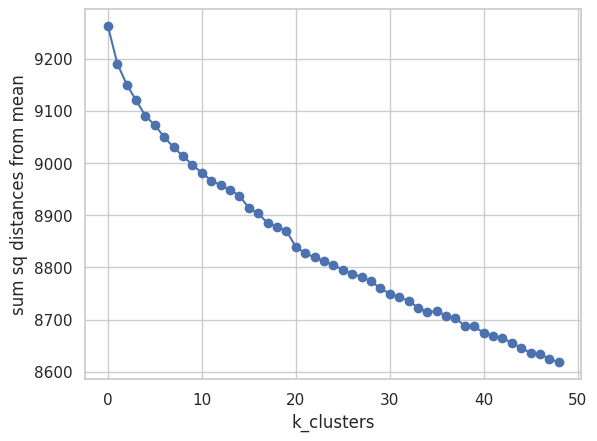

In [46]:
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("k_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

In [47]:
k = 28
kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
kmeans_labels = kmeans.fit_predict(X_reduced)
df_sample['kmean_clusters'] = kmeans_labels

### Evaluation Metrics

1. **Silhouette Score**
- **Formula**: For each data point $i$:
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Where:
- $a(i)$ is the average distance from point $i$ to all other points in the same cluster (intra-cluster distance).
- $b(i)$ is the average distance from point $i$ to all points in the nearest cluster (inter-cluster distance).

**Interpretation**:
- **Range**: -1 to 1
 - **1**: Excellent clustering, points are well-separated and close to their own cluster’s centroid.
 - **0**: Points are near the boundary between two clusters.
 - **-1**: Points may be in the wrong cluster.
- **Goal**: Maximize the score (a higher score means better clustering).

---

2. **Davies-Bouldin Score**
- **Formula**:

$$DB = \frac{1}{N} \sum_{i=1}^{N} \max_{j \neq i} \frac{s_i + s_j}{d_{ij}}$$

Where:
- $s_i$ is the average distance between points in cluster $i$ and the centroid of cluster $i$ (intra-cluster distance).
- $d_{ij}$ is the distance between the centroids of clusters $i$ and $j$ (inter-cluster distance).
- $N$ is the number of clusters.

**Interpretation**:
- **Lower Davies-Bouldin Score**: Indicates better clustering (more compact and well-separated clusters).
- **Higher Davies-Bouldin Score**: Indicates worse clustering (overlapping clusters or poorly separated clusters).
- **Goal**: Minimize the score (a lower score means better clustering).

---

3. **Calinski-Harabasz Score (Variance Ratio Criterion)**
- **Formula**:

$$CH = \frac{{\text{trace}(B_k) / (k - 1)}}{{\text{trace}(W_k) / (n - k)}}$$

Where:
- $B_k$ is the between-cluster dispersion matrix.
- $W_k$ is the within-cluster dispersion matrix.
- $k$ is the number of clusters.
- $n$ is the total number of data points.

**Interpretation**:
- **Higher Calinski-Harabasz Score**: Indicates better clustering (larger variance between clusters and smaller variance within clusters).
- **Lower Calinski-Harabasz Score**: Indicates poor clustering (overlapping clusters or large variance within clusters).
- **Goal**: Maximize the score (a higher score means better clustering).

In [48]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [64]:
# silhouette score
kmeans_silhouette = silhouette_score(X_reduced, kmeans_labels)
kmeans_silhouette

0.009723616215240143

In [65]:
# davies bouldin score
kmeans_davies_bouldin = davies_bouldin_score(X_reduced, kmeans_labels)
kmeans_davies_bouldin

7.610728588735069

In [66]:
# calinski harabasz score
kmeans_calinski_harabasz = calinski_harabasz_score(X_reduced, kmeans_labels)
kmeans_calinski_harabasz

20.215956010991125

### Visualization

#### **UMAP (Uniform Manifold Approximation and Projection)**

UMAP is a dimensionality reduction technique used for reducing high-dimensional data into lower dimensions (typically 2D or 3D) while preserving both local and global structures in the data. It is commonly used for data visualization or pre-processing for further analysis.

**Key Parameters**:
- **n_neighbors**: Controls the size of the local neighborhood for approximating the manifold (larger values preserve global structure).
- **min_dist**: Controls how tightly data points are packed in the low-dimensional space (smaller values pack points more tightly).
- **n_components**: The number of dimensions for the output embedding (e.g., 2D for visualization).

UMAP does not perform clustering but can be used for visualizing clusters or structures within data. It is faster and more scalable than t-SNE for large datasets and preserves both local and global structures.

In [ ]:
!pip install umap-learn

In [54]:
from umap import UMAP

umap_embeddings = UMAP(n_neighbors=100, min_dist=0.3, n_components=2)
X_umap = umap_embeddings.fit_transform(X_reduced)

<ipython-input-55-734a76757b08>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], palette=palette)


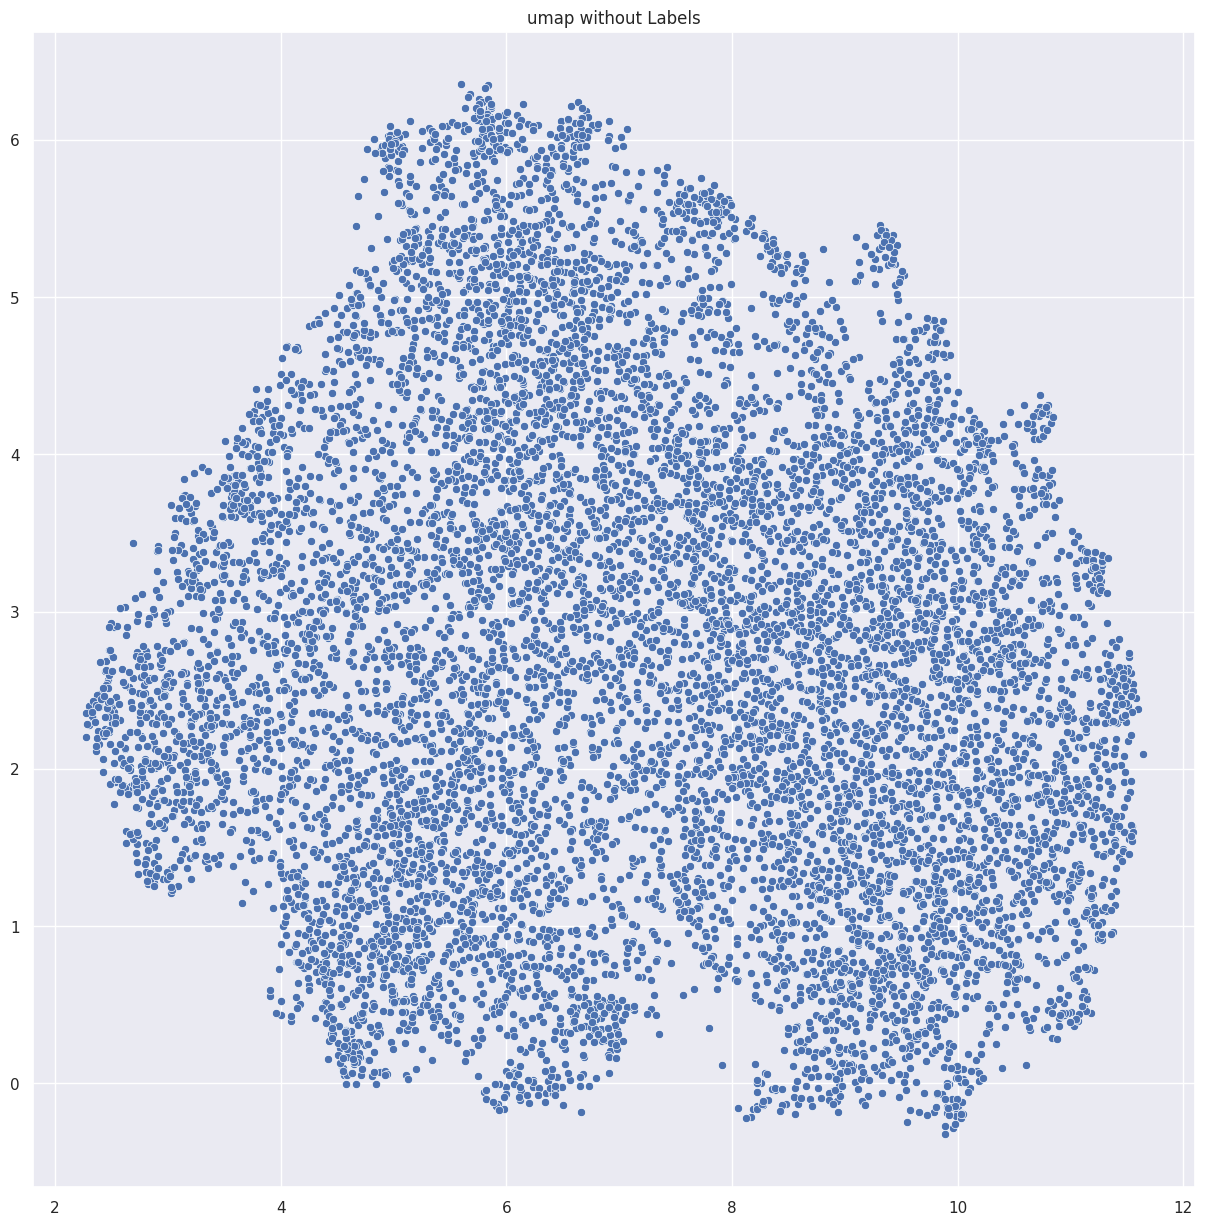

In [55]:
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.color_palette("bright", 1)

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], palette=palette)
plt.title('umap without Labels')
plt.savefig("umap_arxvid.png")
plt.show()

<ipython-input-56-6a6961f59380>:4: UserWarning: 
The palette list has fewer values (20) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=kmeans_labels, legend='full', palette=palette)


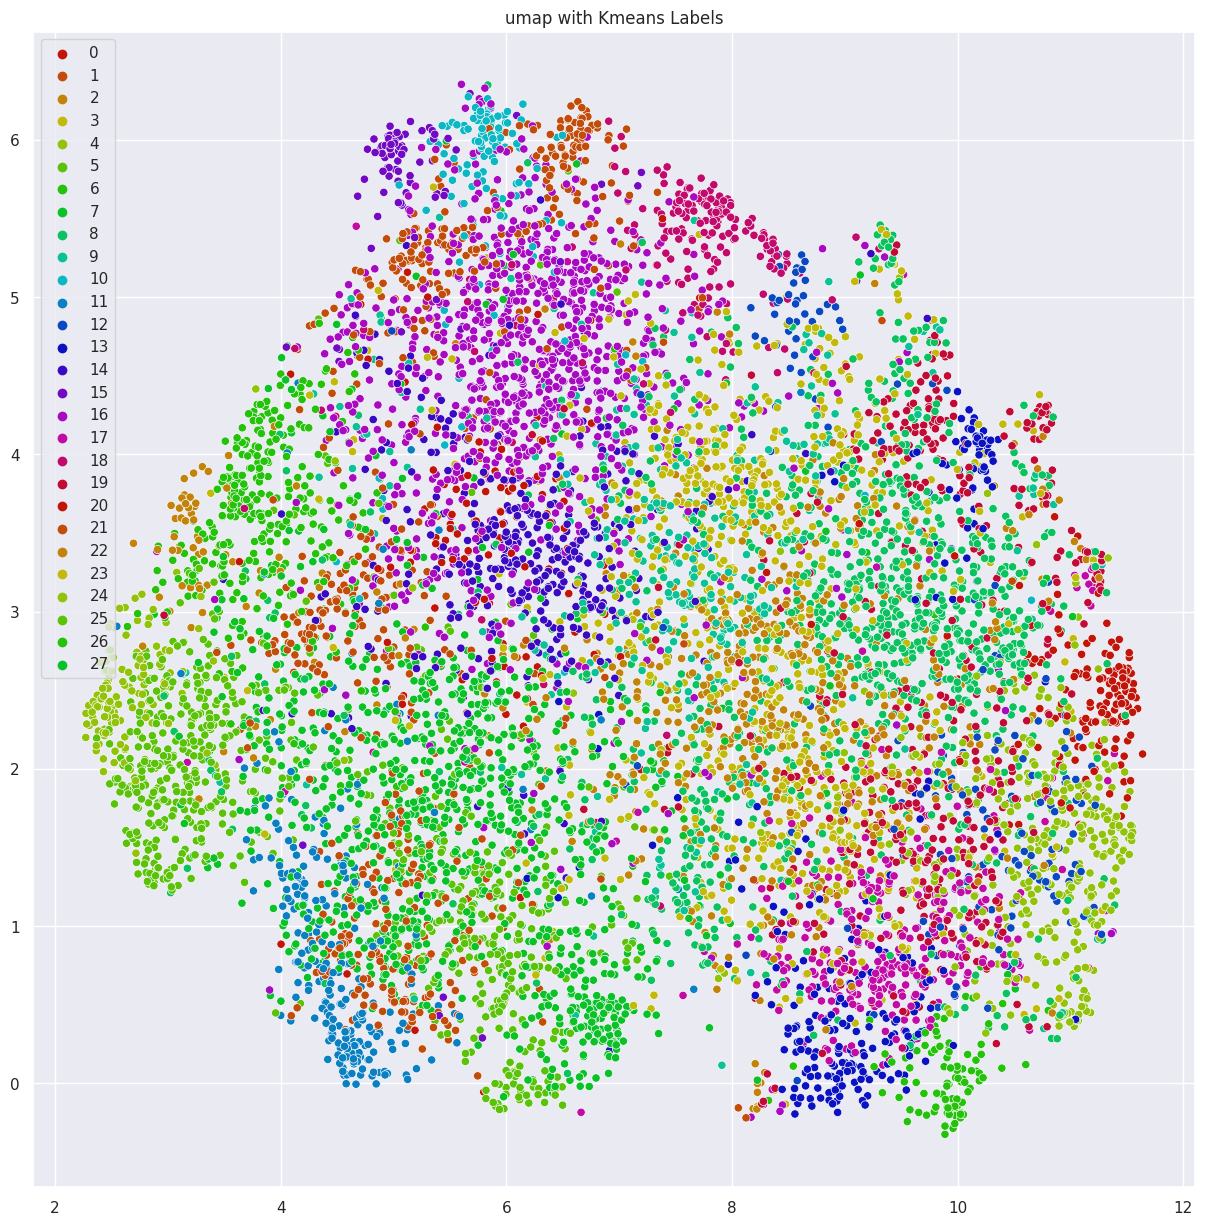

In [56]:
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.hls_palette(20, l=.4, s=.9)

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=kmeans_labels, legend='full', palette=palette)
plt.title('umap with Kmeans Labels')
plt.savefig("cluster_umap_kmeans_labels.png")
plt.show()

#### **t-SNE (t-Distributed Stochastic Neighbor Embedding)**

t-SNE is a dimensionality reduction technique primarily used for visualizing high-dimensional data by reducing it to 2 or 3 dimensions. It focuses on preserving local data relationships, mapping similar points in high-dimensional space to nearby points in the lower-dimensional space.

**Key Parameters**:
- **perplexity**: Controls the balance between local and global structure preservation.
- **random_state**: Ensures reproducibility of results.
- **verbose**: Outputs progress during computation.

t-SNE works well for visualizing clusters or groups in data but can be computationally expensive for large datasets and doesn't preserve global structures well. It doesn't perform clustering itself.

In [57]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.034s...
[t-SNE] Computed neighbors for 10000 samples in 14.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.315538
[t-SNE] KL divergence after 50 iterations with early exaggeration: 83.351334
[t-SNE] KL divergence after 1000 iterations: 2.590151


<ipython-input-58-c5fe4c43609a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)


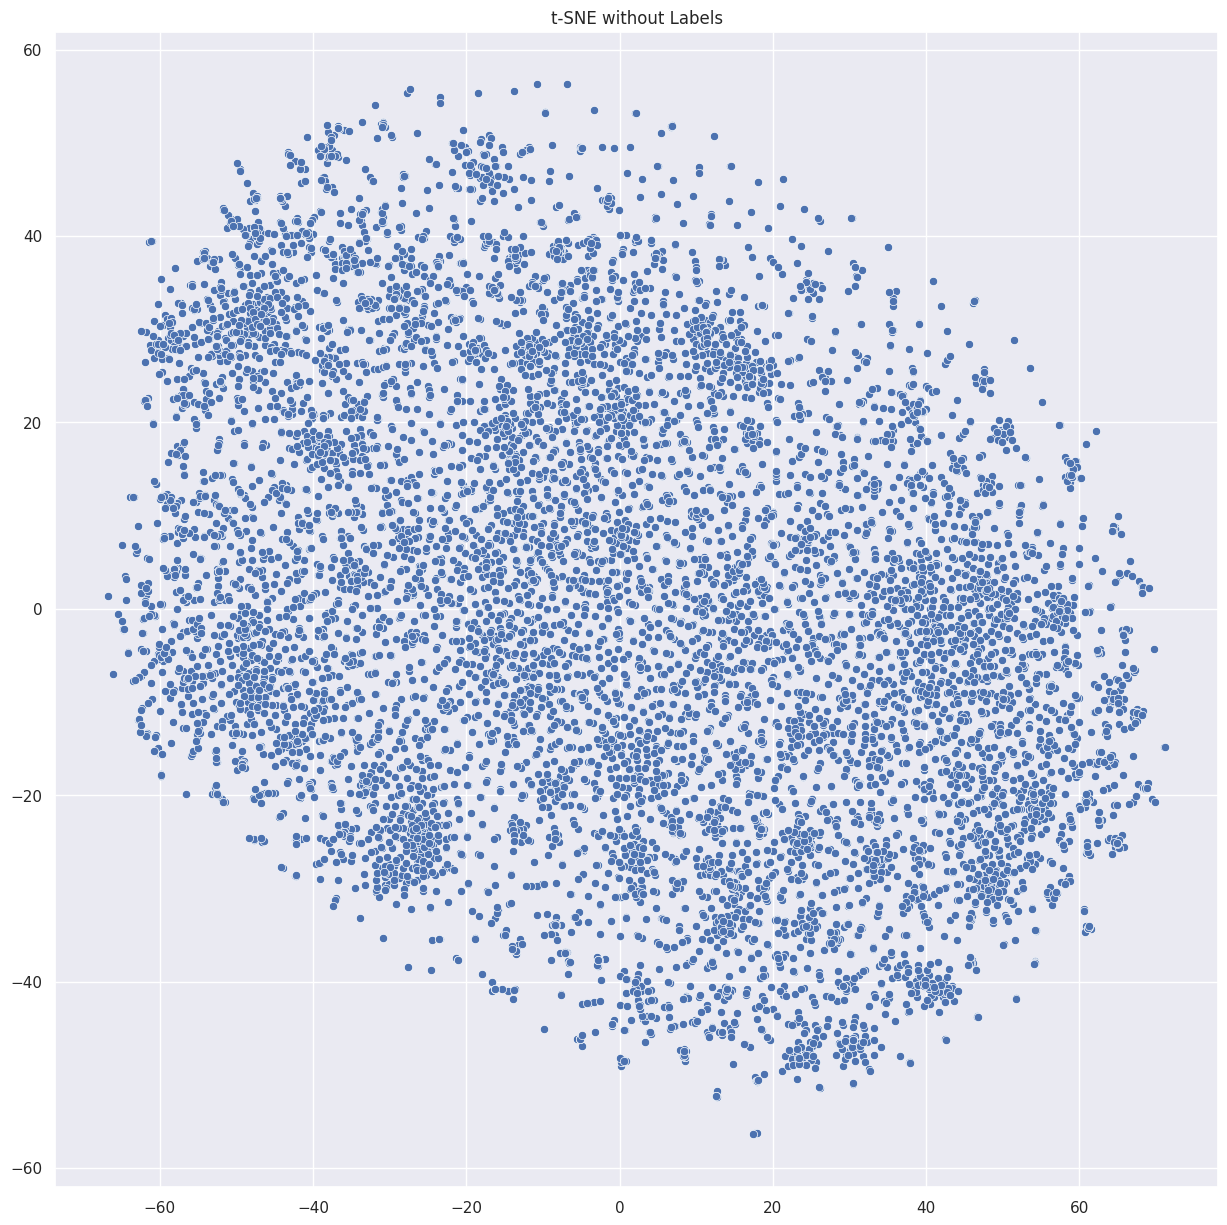

In [58]:
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.color_palette("bright", 1)

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)
plt.title('t-SNE without Labels')
plt.savefig("t-sne_arxvid.png")
plt.show()

<ipython-input-59-10c3a2eaf569>:5: UserWarning: 
The palette list has fewer values (20) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans_labels, legend='full', palette=palette)


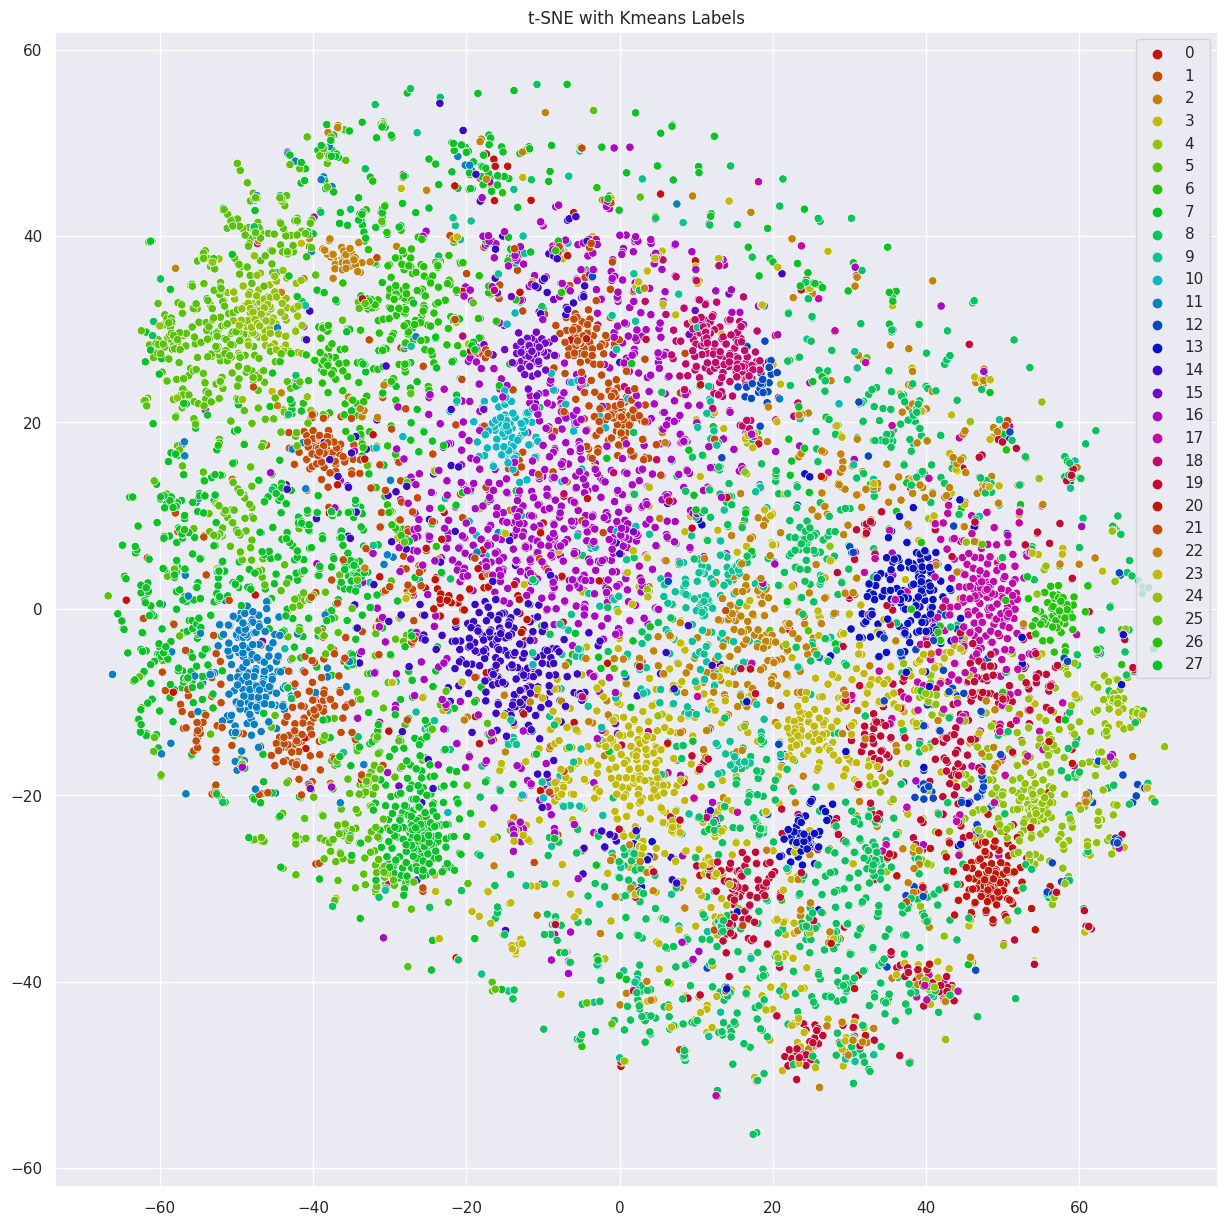

In [59]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.hls_palette(20, l=.4, s=.9)

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans_labels, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("cluster_tsne.png")
plt.show()

## **Spectral Clustering**

A graph-based clustering method that uses the eigenvalues of the graph Laplacian matrix to perform dimensionality reduction and identify clusters in the data.

**Calculation**:
  - Build a similarity graph $W$ where edges represent similarities between data points.
  - Compute the graph Laplacian matrix $L = D - W$, where $D$ is the degree matrix.
  - Perform eigen decomposition on $L$ to get eigenvalues and eigenvectors.
  - Use the top $k$ eigenvectors as features and apply K-Means clustering.

**Formula**:
- **Graph Laplacian**: $L = D - W$
- **Normalized Laplacian**: $L_{\text{norm}} = I - D^{-1/2} W D^{-1/2}$

In [62]:
spectral = SpectralClustering(n_clusters=k, random_state=42, n_init=1)
spectral_labels = spectral.fit_predict(X_reduced)
df_sample['spectral_clusters'] = spectral_labels

### Evaluation

In [67]:
# silhouette score
spectral_silhouette = silhouette_score(X_reduced, spectral_labels)
spectral_silhouette

0.009604948654251697

In [68]:
# davies bouldin score
spectral_davies_bouldin = davies_bouldin_score(X_reduced, spectral_labels)
spectral_davies_bouldin

7.29224752798356

In [69]:
# calinski harabasz score
spectral_calinski_harabasz = calinski_harabasz_score(X_reduced, spectral_labels)
spectral_calinski_harabasz

20.708413656461307

### Visualization

<ipython-input-71-a3bacc881af6>:4: UserWarning: 
The palette list has fewer values (20) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=spectral_labels, legend='full', palette=palette)


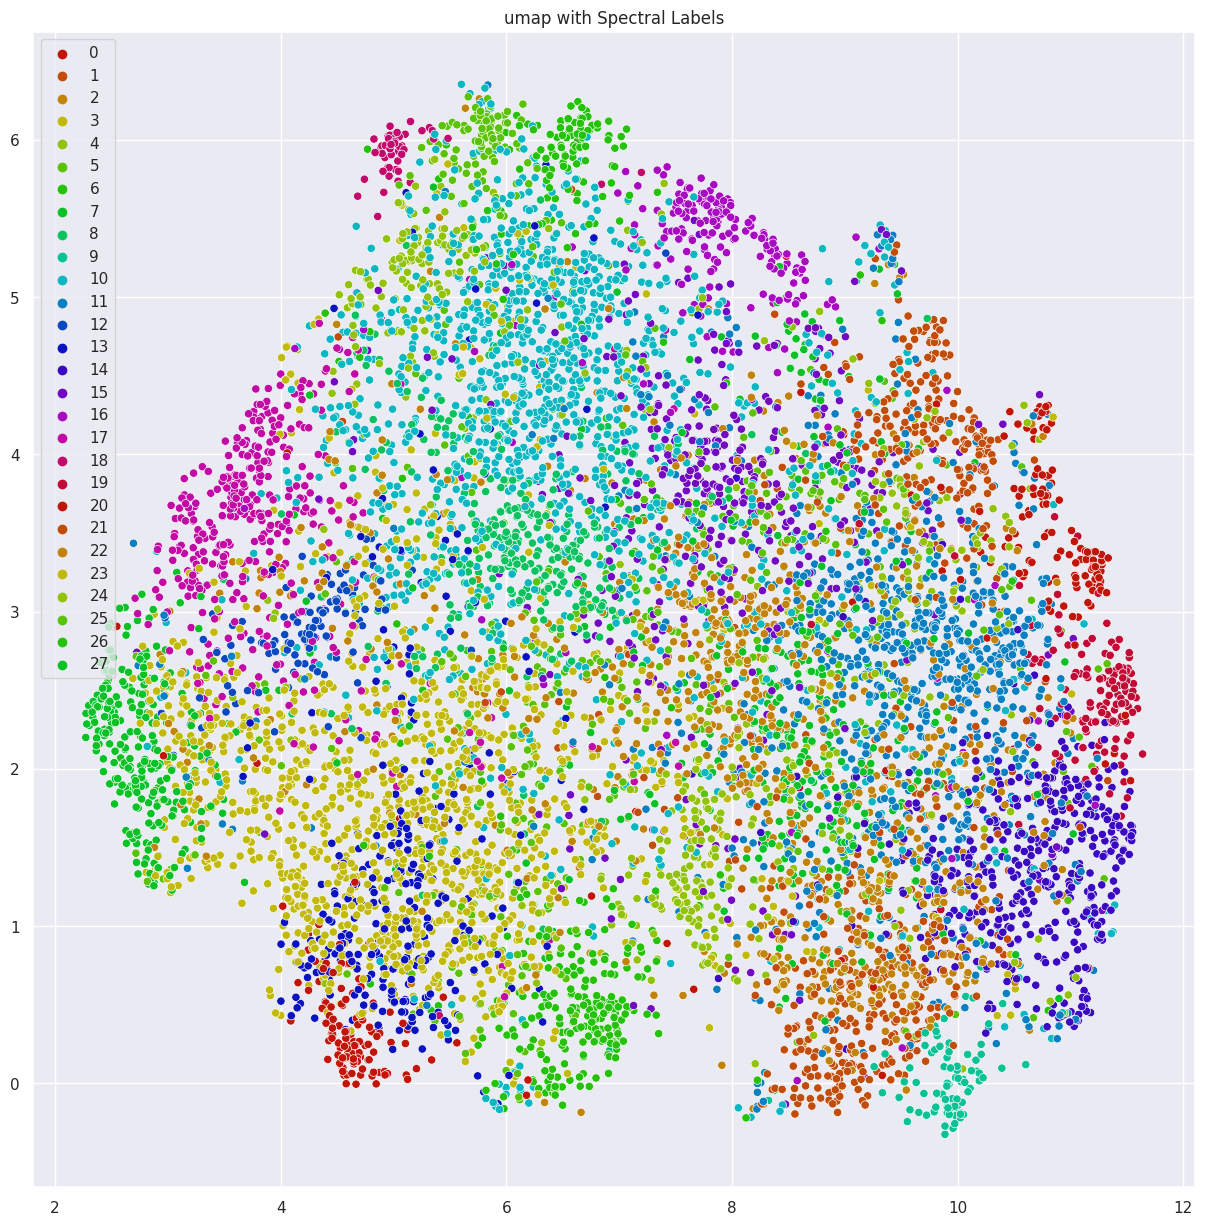

In [71]:
# UMAP
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.hls_palette(20, l=.4, s=.9)
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=spectral_labels, legend='full', palette=palette)
plt.title('umap with Spectral Labels')
plt.savefig("cluster_umap_spectral_labels.png")
plt.show()

<ipython-input-72-658635e818f0>:6: UserWarning: 
The palette list has fewer values (20) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=spectral_labels, legend='full', palette=palette)


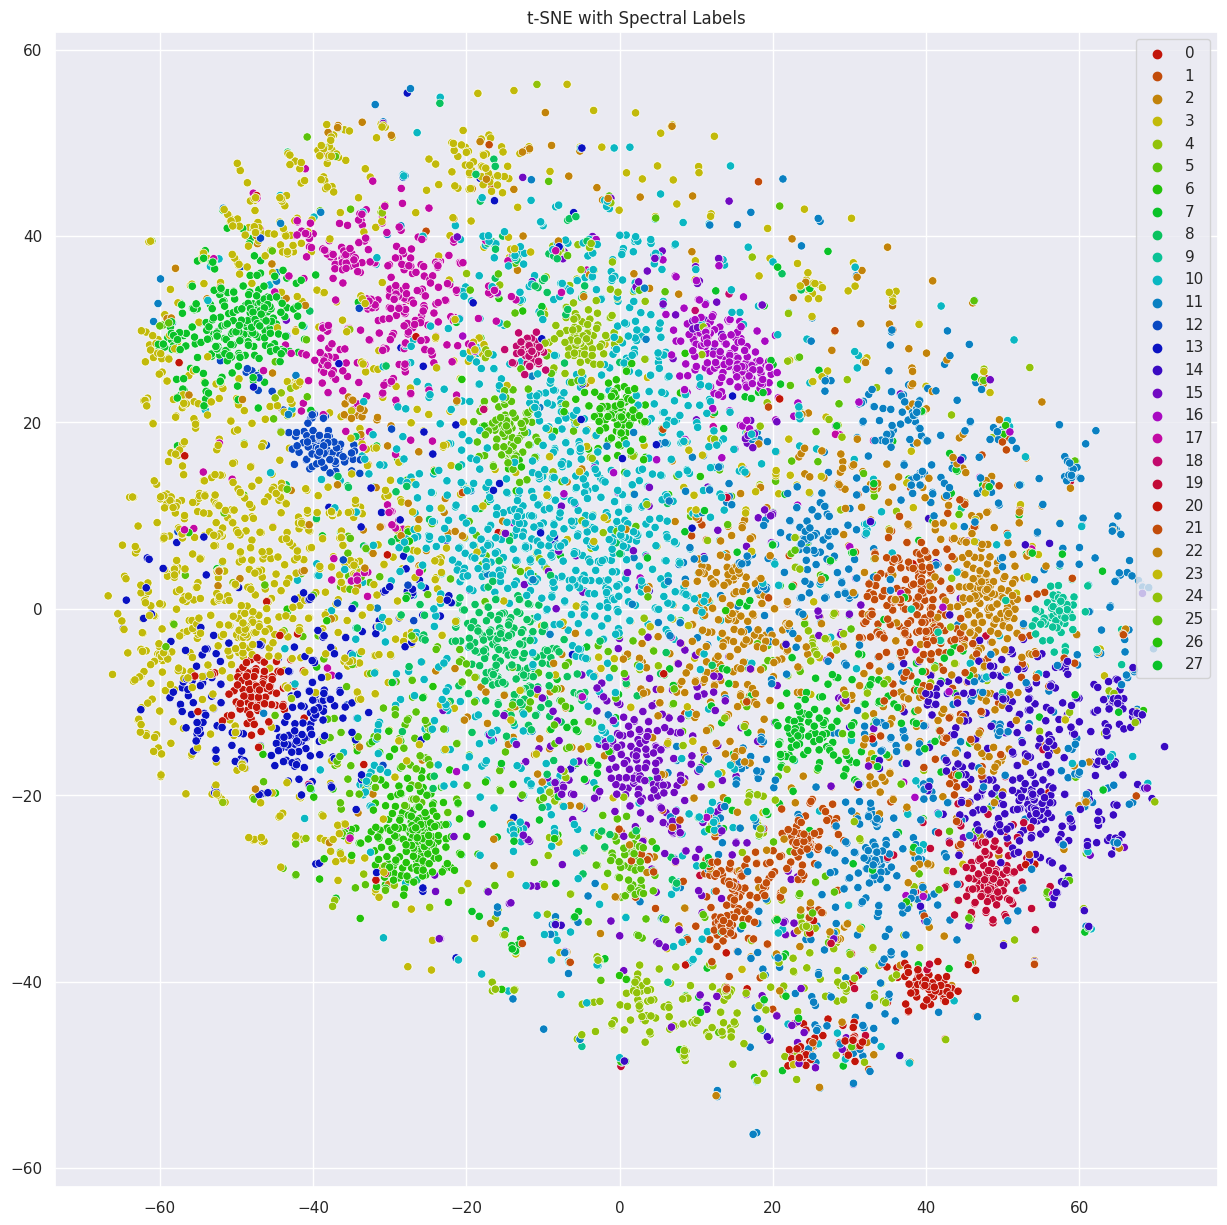

In [72]:
#t-SNE
%matplotlib inline
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.hls_palette(20, l=.4, s=.9)

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=spectral_labels, legend='full', palette=palette)
plt.title('t-SNE with Spectral Labels')
plt.savefig("spectral_cluster_tsne.png")
plt.show()

# Recommendation System

In [106]:
selected_paper_index = 100
cluster_id = kmeans_labels[selected_paper_index]
recommended_papers = [i for i, label in enumerate(kmeans_labels) if (label == cluster_id and i != selected_paper_index)]

In [107]:
data_sample.iloc[selected_paper_index]

id                                                   2203.00812
authors                   Binbin Gu, Saeed Kargar, Faisal Nawab
title         Efficient Dynamic Clustering: Capturing Patter...
categories                                          cs.DB cs.AI
year                                                       2024
abstract        Clustering aims to group unlabeled objects b...
Name: 15554, dtype: object

In [108]:
data_sample.iloc[recommended_papers[0:10]]

id                                            authors  \
12808   2111.01871                                   Alexei M. Frolov   
292617  2411.09779  Jonathan Warrell, Francesco Alesiani, Cameron ...   
71444   2311.15686                                       Jiahui Zhang   
113264  2402.15214  Vishwanath Pratap Singh and Md Sahidullah and ...   
66032   2311.00497                                     Shmuel Balberg   
215283  2407.16485                           Baiyu Peng, Aude Billard   
119433  2403.01903  Amirreza Akbari, Xavier Coiteux-Roy, Francesco...   
245737  2409.07694  Xinlei Huang, Jialiang Tang, Xubin Zheng, Jinj...   
93483   2401.13518  Jonas Van Der Donckt, Nicolas Vandenbussche, J...   
18683   2206.06977  Evripides Georgiades, Michael J. S. Lowe, Rich...   

                                                    title  \
12808   General Principles of Hamiltonian Formulations...   
292617  Variational methods for Learning Multilevel Ge...   
71444   Quantum state engineering in a five-state chai...   
113264  ChildAugment: Data Augmentation Methods for Ze...   
66032   Segregation and Collisions in Galactic Nuclei:...   
215283  Learning General Continuous Constraint from De...   
119433  Online Locality Meets Distributed Quantum Comp...   
245737  Learn from Balance: Rectifying Knowledge Trans...   
93483   Addressing Data Quality Challenges in Observat...   
18683   Leaky wave characterisation using spectral met...   

                          categories  year  \
12808                          gr-qc  2024   
292617        q-bio.PE cs.NE math.CT  2024   
71444                       quant-ph  2024   
113264                 eess.AS cs.SD  2024   
66032                    astro-ph.GA  2024   
215283             cs.LG cs.AI cs.RO  2024   
119433  cs.DC cs.CC math.PR quant-ph  2024   
245737                         cs.CV  2024   
93483                          cs.CE  2024   
18683                physics.flu-dyn  2024   

                                                 abstract  
12808     Principles of successful Hamiltonian approac...  
292617    Levels of selection and multilevel evolution...  
71444     In this paper, an exact analytical solution ...  
113264    The accuracy of modern automatic speaker ver...  
66032     The centers of galaxies host a supermassive ...  
215283    Planning for a wide range of real-world task...  
119433    We connect three distinct lines of research ...  
245737    Knowledge Distillation (KD) transfers knowle...  
93483     Chronic disease management and follow-up are...  
18683     Leaky waves are an important class of waves,...

## Pretrained Models

In [109]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.losses import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier

In [111]:
THRESHOLD_YEAR = 2023

dataframe = {
    'title': [],
    'year': [],
    'abstract': []
}

def load_data():
    with open(file_path) as f:
        for line in f:
            yield line

data = load_data()
for i, paper in enumerate(data):
    paper = json.loads(paper)
    try:
        date = int(paper['update_date'].split('-')[0])
        if date > THRESHOLD_YEAR:
            dataframe['title'].append(paper['title'])
            dataframe['year'].append(date)
            dataframe['abstract'].append(paper['abstract'])
    except: pass

In [112]:
df = pd.DataFrame(dataframe)
df.head()

title  year  \
0                   The Veldkamp Space of Two-Qubits  2024   
1  A survey of debris trails from short-period co...  2024   
2                 Metric Properties of Conflict Sets  2024   
3  Quasi Ordinary Singularities, Essential Diviso...  2024   
4  Information feedback and mass media effects in...  2024   

                                            abstract  
0    Given a remarkable representation of the gen...  
1    We observed 34 comets using the 24 micron ca...  
2    In this paper we show that the tangent cone ...  
3    We define Poincar\'e series associated to a ...  
4    We study the effects of different forms of i...

In [113]:
df.to_csv('arxiv_reduced.csv', index=False)
del dataframe

In [114]:
MODEL_URL = "https://tfhub.dev/google/universal-sentence-encoder/4"

# KerasLayer
sentence_encoder_layer = hub.KerasLayer(MODEL_URL,
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="use")

abstracts = df["abstract"].to_list()

In [116]:
if not abstracts:
    print("Error: Abstracts list is empty.")
else:
    embeddings = []
    batch_size = 3000
    num_batches = (len(abstracts) + batch_size - 1) // batch_size  
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(abstracts))
        batch_abstracts = abstracts[start_idx:end_idx]

        if batch_abstracts:  # Check if batch is not empty
            batch_embeddings = sentence_encoder_layer(batch_abstracts)
            embeddings.extend(batch_embeddings.numpy())
        else:
            print(f'batch {i} is empty.')

    embeddings = np.array(embeddings)
    y = df.index


In [117]:
nn = KNeighborsClassifier(n_neighbors=6)
nn.fit(embeddings,y)

KNeighborsClassifier(n_neighbors=6)

In [119]:
import joblib

model_file_path = '/kaggle/working/knn_model_4.joblib'
joblib.dump(nn, model_file_path)

['/kaggle/working/knn_model_4.joblib']

In [121]:
for _ in range(5):
    idx = random.randint(i, len(y))
    sample = df["title"][idx]
    dist, index = nn.kneighbors(X=embeddings[idx,:].reshape(1,-1))
    print(f"Sample:\n{sample}\n")
    for i in range(1,6):
        print(f"Recommendation {i}:\n{df['title'][index[0][i]]}\n")
    print("===============\n")

Sample:
Generalizable Representation Learning for fMRI-based Neurological
  Disorder Identification

Recommendation 1:
Deep Latent Variable Modeling of Physiological Signals

Recommendation 2:
Task-Agnostic Federated Learning

Recommendation 3:
Active Learning on Medical Image

Recommendation 4:
Scaling Up Semi-supervised Learning with Unconstrained Unlabelled Data

Recommendation 5:
Optimal Transport for Latent Integration with An Application to
  Heterogeneous Neuronal Activity Data


Sample:
A Feasible Way to Find Above-Room-Temperature Ferromagnetic Spintronic
  Materials: from Flat Band Engineering

Recommendation 1:
Engineering the Magnetic Transition Temperatures and the Rare Earth
  Exchange Interaction in Oxide Heterostructures

Recommendation 2:
Understanding and predicting adsorption energetics on monolayer
  transition metal dichalcogenides

Recommendation 3:
On the Role of Charge Transfer Excitations in Non-Fullerene Acceptors
  for Organic Photovoltaics

Recommendation 4: